# Application of K-Nearest Neighbors Classification Technique on a Marketing Dataset

One of the main applications of classification is marketing. Sometimes the product a company is advertising is not suitable for all people. For example, a person between the ages of 20 and 25 may like to spend more on smartphone covers than a person between the ages of 40 and 45. Likewise, a high-income person can afford to spend more on luxury goods than a low-income person. A business that wants to advertise a product likes to know which user will buy the product. This could be really helpful for the company selling their products. Predicting if a user is a potential customer or not is a classification problem.

In this Machine Learning Analysis the KNN classification technique will be applied to predict if a user can be a potential customer (will buy the advertised product) based on his/her attributes available in the dtatset e.g. age, gender, estimated salary and whether they purchased the product.

In [18]:
#Importing the required libraries

import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
#Returns number of rows and columns
dataset.shape

(400, 5)

In [4]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


The 'Purchased' Column  in the dataset contain the dependent attribute we would be training our dataset to predict whether a customer purchased the product or not.
     0 - Signifies that particular customer did not purchased the product
     1 - Signifies that particular customer purchased the product

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


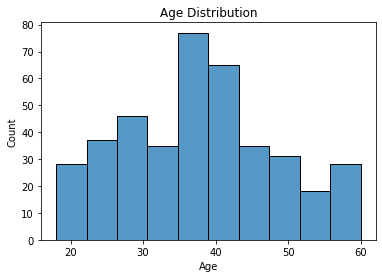

In [6]:
sns.histplot(dataset.Age)
plt.title("Age Distribution")
plt.show()

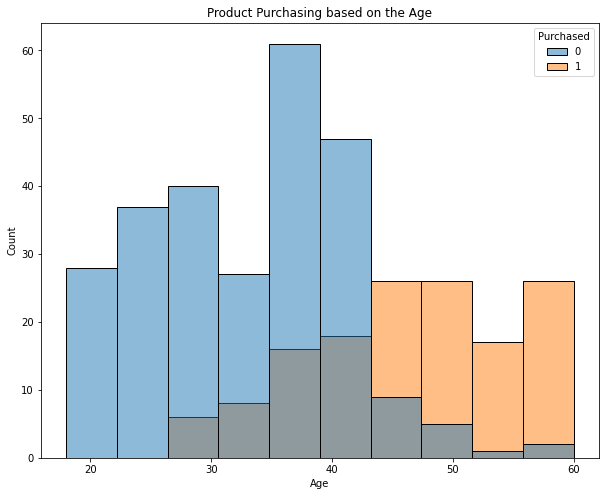

In [7]:
plt.figure(figsize=(10,8))
plt.title("Product Purchasing based on the Age")
sns.histplot(x="Age", hue="Purchased", data = dataset)
plt.show()

In [19]:
# The KNN Classification Methid uses a Distance measure e.g. (Euclidean Distance) to find similarities between data points and Neighbours. 
# Hence, to prepare our data for Training we have to convert all categorical attributes to Numerical
dataset["Gender"] = dataset["Gender"].replace(['Male', 'Female'], [0,1])
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [9]:
# Seprating the columns into the independent and dependent variables/attributes
 
X = dataset.iloc[:, [1,2,3]].values
Y = dataset.iloc[:, 4].values

Y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [21]:
#We divide out dataset into training and test by leveraging the model_selection module of sklearn
#Here we are taking out 30% of your datatset to test the trained dataset. ergo 70% for training

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 0)

# The random state hyperparameter in the train_test_split() function controls the shuffling process. 
# With random_state=None, we get different train and test sets across different executions. 
# If a fixed value is assigned to it like random_state=0, we get the same train and test sets across different executions.



In [11]:
# A dataset usually contains features of various dimensions and scales. Different scales of the data features can affect the modeling of a dataset. 
# Many machine learning algorithms such as KNN perform better when numerical input variables are scaled to a standard range. 
# Standardization scales each input variable separately by subtracting the mean and dividing by the standard deviation to shift the distribution to have a mean of zero 
# and a standard deviation of one.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train) # Scale the training data and also learn the scaling parameters of that data
X_test_sc = sc.transform(X_test) # Scale test data by the same mean and variance that is calculated from our training data above.

In [12]:
#Fitting KNN to the Dataset

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5, metric= "minkowski", p=2) #p is power parameter for the Minkowski metric. When p = 2, this is equivalent to euclidean_distance.
classifier.fit(X_train_sc, Y_train)

KNeighborsClassifier()

In [22]:
#Predicting our Y with the Test dataset
Y_pred = classifier.predict(X_test_sc)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [14]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [26]:
#Calculating the percentage accuracy using for loop

right = 0
for i in range(0,len(Y_test)):
    if Y_test[i] == Y_pred[i]:
        right+=1
accr = ((right/len(Y_pred))*100)

accr = '{0:.3g}'.format(accr)
print(accr + "%")


91.7%


In [16]:

#Evaluating the performance metrics

from sklearn import metrics
accuracy = metrics.accuracy_score(Y_test, Y_pred)
cm = metrics.confusion_matrix(Y_test, Y_pred)
result = metrics.classification_report(Y_test, Y_pred)

print("Accuracy is ", round(accuracy,2), " % \n\n")#
print("Confusion Matrix \n", cm, "\n\n")
print("Classification Report \n", result)


Accuracy is  0.92  % 


Confusion Matrix 
 [[73  6]
 [ 4 37]] 


Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



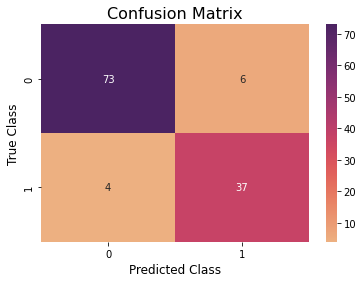

In [27]:
ax = sns.heatmap(cm, cmap='flare', annot = True, fmt = 'd')
plt.xlabel("Predicted Class", fontsize = 12)
plt.ylabel("True Class", fontsize = 12)
plt.title("Confusion Matrix", fontsize=16)

plt.show()

From the Test Dataset, 
of all the people that purchased the product the model predicted 90% correctly. Recall / Sensitivity
of all the people that did not purchase the product the model predicted 92% correctly. Specificity

Also,
of all the people the model predicted to purchase the product, 86% were correctly predicted.
of all the people the model predicted not to purchase the product, 95% were correctly predicted.

The overall accuracy of the model was 92%.

We can say the Model perfomred well. 